<a href="https://colab.research.google.com/github/dele22922/tarea3_feat_eng/blob/main/ExamenFinal_VICTORDELEON_22922.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final VICTOR DE LEON /VDELEON 22922

ANTONIO MEDRANO UVG

CURSO BUSINESS ANALYTICS MODELS


## **Problema 1**

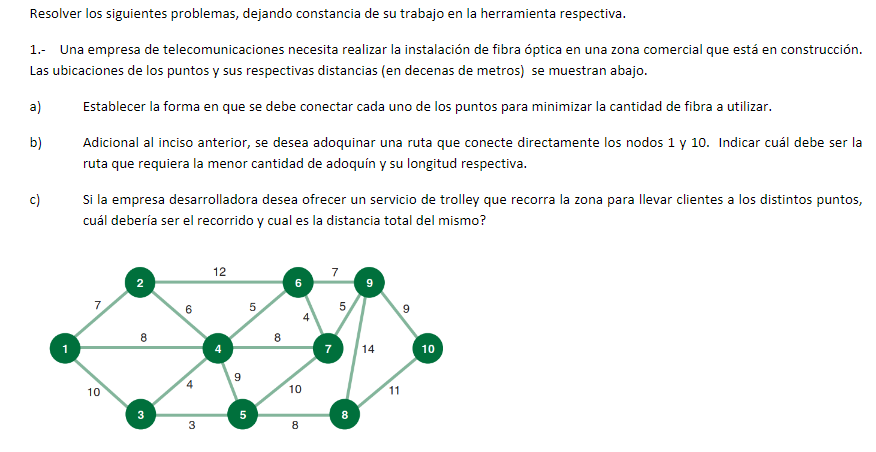

In [ ]:
## Importamos las librerias
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## Definir los arcos y su respectiva capacidad

arcos_a = [(1,2,7),(2,1,7),(1,4,8),(4,1,8),(1,3,10),(3,1,10),(2,4,6),(4,2,6),(2,6,12),(6,2,12),(3,4,4),(4,3,4),(3,5,3),(5,3,3),(4,6,5),(6,4,5),(4,5,9),(5,4,9),
 (5,7,10),(7,5,10),(5,8,8),(8,5,8),(4,7,8),(7,4,8),(6,9,7),(9,6,7),(7,9,5),(9,7,5),(8,9,14),(9,8,14),(8,10,11),(10,8,11),(9,10,9),(10,9,9)]

In [ ]:
grafo1 = nx.Graph()
for x in arcos_a:
    grafo1.add_edge(x[0],x[1], weight=x[2])


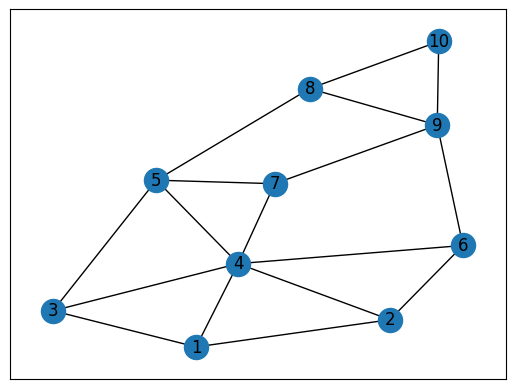

In [ ]:
nx.draw_networkx(grafo1, with_labels=True)

## **Respuesta A)**
## La Fibra se debe de conectar en la siguiente forma utilizando el algoritmos de Minimum Spanning Tree para poder aprovechar de la mejor manera, de tal manera que se consuman 54 mts unicamente.

In [ ]:
from networkx.algorithms.tree.mst import minimum_spanning_tree
arbol = minimum_spanning_tree(grafo1)

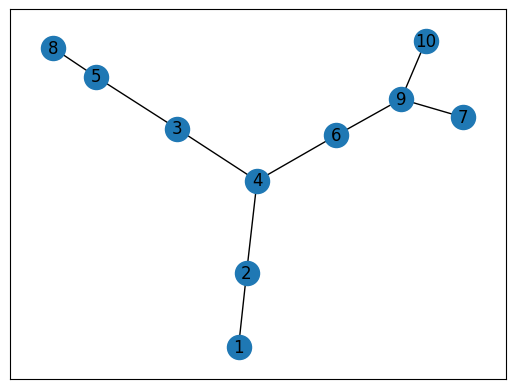

In [ ]:
nx.draw_networkx(arbol,with_labels=True)

In [ ]:
arcosarbol = nx.minimum_spanning_edges(grafo1)

listarcos=[]
for x in arcosarbol:
  listarcos.append(x)

listarcos
sum(x[2]['weight'] for x in listarcos)

54

## **Respuesta B)**
## Para adoquinar de manera mas económica y corta entre el punto 1 y el punto 10 se debe de adoquinar los puntos 1,4,6,9 y 10 para un total de 29 mts.

In [ ]:
inicio = 1
fin = 10
print(nx.shortest_path(grafo1,inicio, fin, weight='weight'))
print(nx.shortest_path_length(grafo1,inicio,fin,weight='weight'))

[1, 4, 6, 9, 10]
29


In [ ]:
print(nx.spanning_tree_expansion(grafo1,inicio, fin, weight='weight'))
print(nx.shortest_path_length(grafo1,inicio,fin,weight='weight'))

## **Respuesta C)**
## El recorrido podrá llevar a cualquier punto con una distancia de 680 mts. y esto se logrará calcular utilizando el algoritmo del vendedor rutero.

## **Problema 2**
Programación Lineal Mixta

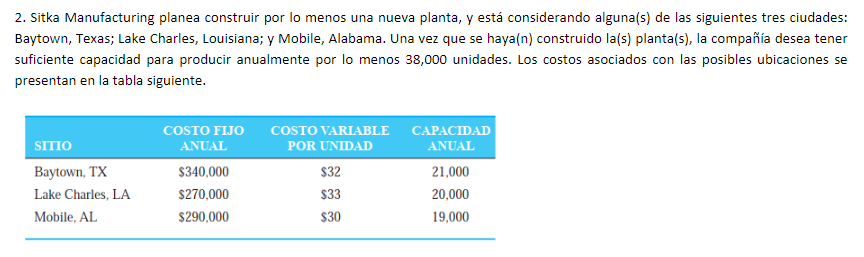

In [19]:
!pip install pulp
from pulp import *
import numpy as np

Variables de Datos

In [20]:
l = ['A', 'B', 'C']

In [21]:
alquiler  = np.array([340000, 270000, 290000])
capacidad = np.array([21000, 20000, 19000])
demanda   = np.array([38000])

In [22]:
 distritos = 1
 almacenes = 3

In [23]:
model = LpProblem("acero", LpMinimize)

Variables de Decision

In [24]:
vn = [str(i) + str(j) for j in range(1, distritos + 1) for i in range(1, almacenes + 1)]
vn.sort()

In [25]:
dv_variables = LpVariable.matrix("x", vn, cat = "Integer", lowBound= 0)
mat = np.array(dv_variables).reshape(3,1)
print(mat)

[[x_11]
 [x_21]
 [x_31]]


In [26]:
usar_w = LpVariable.matrix("almacen", range(almacenes), cat = "Binary")

Funcion Objetivo

In [27]:
model += lpSum(mat) + lpSum(alquiler[i] * usar_w[i] for i in range(almacenes))

In [28]:
model

acero:
MINIMIZE
340000*almacen_0 + 270000*almacen_1 + 290000*almacen_2 + 1*x_11 + 1*x_21 + 1*x_31 + 0
VARIABLES
0 <= almacen_0 <= 1 Integer
0 <= almacen_1 <= 1 Integer
0 <= almacen_2 <= 1 Integer
0 <= x_11 Integer
0 <= x_21 Integer
0 <= x_31 Integer

Restricción de Demandas

In [29]:
for j in range(distritos):
  model += lpSum(mat[i][j] for i in range(almacenes)) >= demanda[j] , "Demanda" + str(j + 1)

Restricción de Capacidad por Planta

In [30]:
for i in range(almacenes):
    model += lpSum(mat[i][j] for j in range(distritos)) <= capacidad[i], "Capacidad" + str(l[i])

In [31]:
model

acero:
MINIMIZE
340000*almacen_0 + 270000*almacen_1 + 290000*almacen_2 + 1*x_11 + 1*x_21 + 1*x_31 + 0
SUBJECT TO
Demanda1: x_11 + x_21 + x_31 >= 38000

CapacidadA: x_11 <= 21000

CapacidadB: x_21 <= 20000

CapacidadC: x_31 <= 19000

VARIABLES
0 <= almacen_0 <= 1 Integer
0 <= almacen_1 <= 1 Integer
0 <= almacen_2 <= 1 Integer
0 <= x_11 Integer
0 <= x_21 Integer
0 <= x_31 Integer

In [32]:
model.solve()

1

In [33]:
status =  LpStatus[model.status]
print(status)

Optimal


In [34]:
print("Total Cost:", model.objective.value())

Total Cost: 38000.0


In [35]:
for v in model.variables():
  print(v.name,"=", v.value())

almacen_0 = 0.0
almacen_1 = 0.0
almacen_2 = 0.0
x_11 = 21000.0
x_21 = 17000.0
x_31 = 0.0


Respuesta al problema 2:
Se construirá el sitio Baytown con 21000 unidades y Lake Charles Louisiana con 17000 unidades. No se construirá planta Mobile Alabama.

Problema de Cobertura

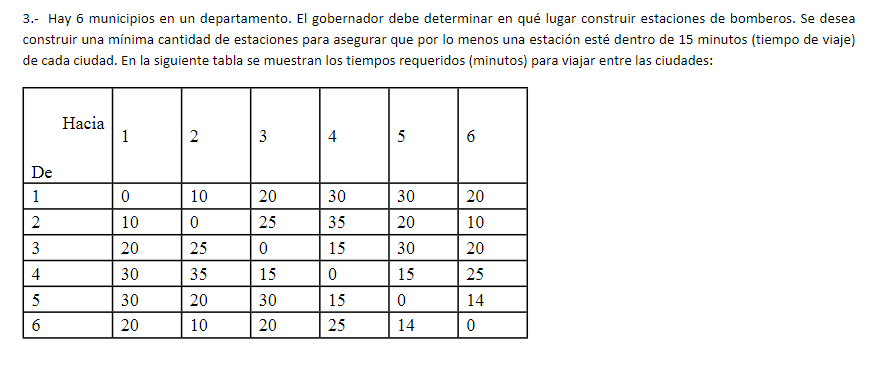

In [50]:
!pip install pulp
from pulp import *
import numpy as np

Variables de Datos

In [51]:
m=np.array([[1,1,0,0,0,0],
            [1,1,0,0,0,1],
            [0,0,1,1,0,0],
            [0,0,1,1,1,0],
            [0,0,0,1,1,1],
            [0,1,0,0,1,1]])

In [52]:
numvar = m.shape[0]
numvar

6

Variables de Decision

In [53]:
## Generar las variables de decision

x = LpVariable.matrix('x',range(1,numvar+1),0,None,'Integer')

Problema y tipo de Optimización

In [55]:
## Creamos el problema de optimizacion

FireCover = LpProblem("FireCover",LpMinimize)

Funcion Objetivo

In [56]:
## Agregar la funcion objetivo

FireCover += lpSum([x[i] for i in range(numvar)])

Restricciones

In [57]:
m.dot(x) #Restricciones, la multiplicacion de la matriz m producto punto por un vector x

array([1*x_1 + 1*x_2 + 0, 1*x_1 + 1*x_2 + 1*x_6 + 0, 1*x_3 + 1*x_4 + 0,
       1*x_3 + 1*x_4 + 1*x_5 + 0, 1*x_4 + 1*x_5 + 1*x_6 + 0,
       1*x_2 + 1*x_5 + 1*x_6 + 0], dtype=object)

In [58]:
#cada elemento anterior debe de ser mayor o igual a 1
for i in m.dot(x):
    FireCover += i >= 1

In [59]:
FireCover

FireCover:
MINIMIZE
1*x_1 + 1*x_2 + 1*x_3 + 1*x_4 + 1*x_5 + 1*x_6 + 0
SUBJECT TO
_C1: x_1 + x_2 >= 1

_C2: x_1 + x_2 + x_6 >= 1

_C3: x_3 + x_4 >= 1

_C4: x_3 + x_4 + x_5 >= 1

_C5: x_4 + x_5 + x_6 >= 1

_C6: x_2 + x_5 + x_6 >= 1

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= x_4 Integer
0 <= x_5 Integer
0 <= x_6 Integer

In [60]:
FireCover.solve()

1

In [61]:
for v in FireCover.variables():
    print(v, v.varValue)

x_1 0.0
x_2 1.0
x_3 0.0
x_4 1.0
x_5 0.0
x_6 0.0


Respuesta: Si se construye las estaciones de Bomberos en los municipios 2 y 4 se estaría cumpliento con la cobertura de los 6 municipios y los tiempos de 15 minutos.